# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.6736847285653482
3.8847769553910783 -0.6766359958539782
3.8887777555511103 -0.6795764326493511
3.8927785557111423 -0.6825059918857165
3.8967793558711743 -0.6854246266714343
3.9007801560312063 -0.6883322902897256
3.9047809561912383 -0.6912289361994198
3.9087817563512703 -0.6941145180357001
3.9127825565113024 -0.6969889896108455
3.9167833566713344 -0.6998523049149701
3.9207841568313664 -0.7027044181167592
3.9247849569913984 -0.7055452835642037
3.9287857571514304 -0.70837485578533
3.9327865573114624 -0.7111930894889282
3.9367873574714944 -0.7139999395652773
3.9407881576315265 -0.7167953610868667
3.9447889577915585 -0.7195793093091156
3.9487897579515905 -0.7223517396710895
3.9527905581116225 -0.7251126077962124
3.9567913582716545 -0.727861869492979
3.9607921584316865 -0.73059948075566
3.9647929585917185 -0.7333253977650076
3.9687937587517506 -0.7360395768889568
3.9727945589117826 -0.7387419746833238
3.9767953590718146 -0.7414325478925008
3.9807961592318466 -0.7441112534501492
3.98479695

7.673534706941388 0.9837635813763738
7.67753550710142 0.9844737268653757
7.681536307261452 0.9851681144932442
7.685537107421484 0.9858467331453465
7.689537907581516 0.9865095719594544
7.693538707741548 0.9871566203259174
7.69753950790158 0.9877878678878332
7.701540308061612 0.988403304541213
7.705541108221644 0.9890029204351436
7.709541908381676 0.9895867059719446
7.713542708541708 0.9901546518073229
7.71754350870174 0.990706748850521
7.721544308861772 0.9912429882644637
7.725545109021804 0.9917633614658986
7.729545909181836 0.9922678601255345
7.733546709341868 0.9927564761681738
7.7375475095019 0.9932292017728419
7.741548309661932 0.9936860293729133
7.745549109821964 0.9941269516562312
7.749549909981996 0.994551961565226
7.7535507101420285 0.9949610522970271
7.7575515103020605 0.9953542173035728
7.7615523104620925 0.9957314502917142
7.7655531106221245 0.9960927452233166
7.7695539107821565 0.9964380963153558
7.7735547109421885 0.996767498040011
7.7775555111022205 0.9970809451247524
7.7

11.410282056411281 -0.9152341060761567
11.414282856571313 -0.9136147732306922
11.418283656731345 -0.9119808167194728
11.422284456891378 -0.9103322626962284
11.42628525705141 -0.9086691375483419
11.430286057211442 -0.9069914678964276
11.434286857371474 -0.9052992805939042
11.438287657531506 -0.9035926027265658
11.442288457691538 -0.9018714616121479
11.44628925785157 -0.90013588479989
11.450290058011602 -0.8983859000700953
11.454290858171634 -0.8966215354336852
11.458291658331666 -0.8948428191317516
11.462292458491698 -0.8930497796351045
11.46629325865173 -0.8912424456438165
11.470294058811762 -0.8894208460867633
11.474294858971794 -0.8875850101211606
11.478295659131826 -0.8857349671320977
11.482296459291858 -0.8838707467320664
11.48629725945189 -0.8819923787604883
11.490298059611922 -0.8800998932832358
11.494298859771954 -0.8781933205921516
11.498299659931986 -0.876272691204564
11.502300460092018 -0.8743380358627977
11.50630126025205 -0.8723893855336824
11.510302060412082 -0.87042677140

15.339067813562712 0.3605854135050028
15.343068613722744 0.35685088650600516
15.347069413882776 0.3531106476159113
15.351070214042808 0.3493647567024084
15.35507101420284 0.3456132737236519
15.359071814362872 0.34185625872730613
15.363072614522904 0.3380937718495829
15.367073414682936 0.33432587331427904
15.371074214842968 0.33055262343181246
15.375075015003 0.3267740825982568
15.379075815163032 0.3229903112943746
15.383076615323064 0.3192013700846494
15.387077415483096 0.3154073196163161
15.391078215643129 0.3116082206183904
15.39507901580316 0.3078041339006967
15.399079815963193 0.3039951203528948
15.403080616123225 0.300181240943505
15.407081416283257 0.2963625567189327
15.411082216443289 0.2925391288024908
15.41508301660332 0.2887110183934216
15.419083816763353 0.2848782867659173
15.423084616923385 0.2810409952681388
15.427085417083417 0.27719920532123427
15.431086217243449 0.2733529784183556
15.43508701740348 0.2695023761236744
15.439087817563513 0.2656474600713964
15.443088617723

0.42802147980412003
19.295859171834365 0.43163384202643157
19.299859971994398 0.43523929535320066
19.30386077215443 0.43883778207416924
19.30786157231446 0.4424292445905894
19.311862372474494 0.4460136254161453
19.315863172634526 0.4495908671778734
19.319863972794558 0.4531609126170805
19.32386477295459 0.4567237045902608
19.32786557311462 0.46027918607001006
19.331866373274654 0.46382730014593854
19.335867173434686 0.4673679900255821
19.339867973594718 0.47090119903531097
19.34386877375475 0.47442687062123723
19.34786957391478 0.4779449483501196
19.351870374074814 0.4814553759102671
19.355871174234846 0.48495809711244026
19.359871974394878 0.4884530558907505
19.36387277455491 0.4919401963035575
19.36787357471494 0.49541946253436475
19.371874374874974 0.4988907988927128
19.375875175035006 0.5023541498150709
19.379875975195038 0.505809459865726
19.38387677535507 0.5092566737376706
19.387877575515102 0.5126957362534874
19.391878375675134 0.5161265923662332
19.395879175835166 0.5195491871

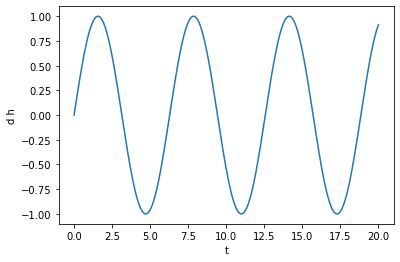

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

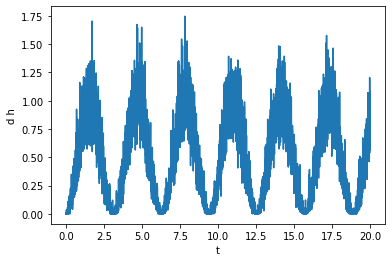

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

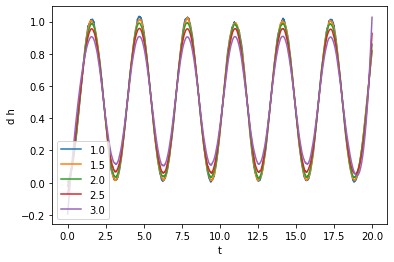

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

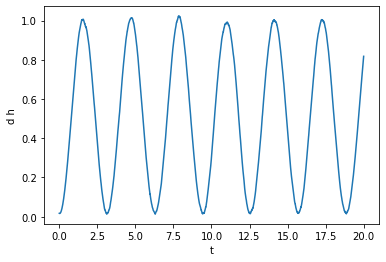

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1794


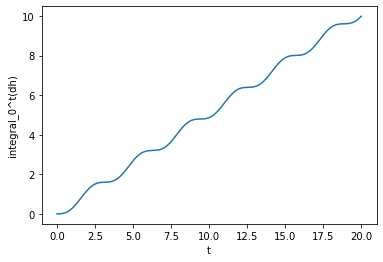

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

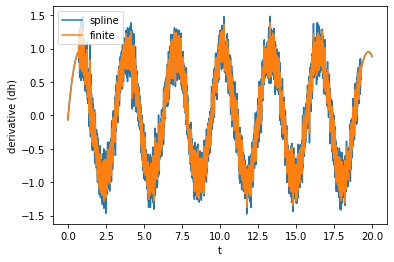

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

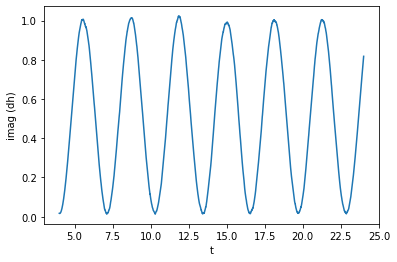

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

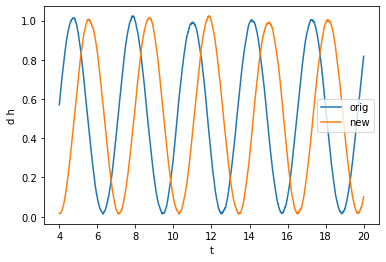

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

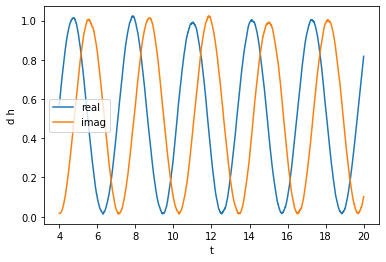

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

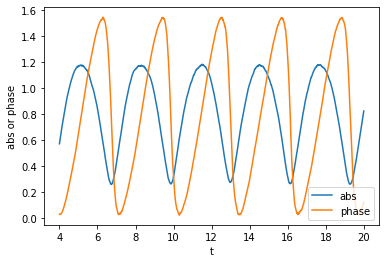

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

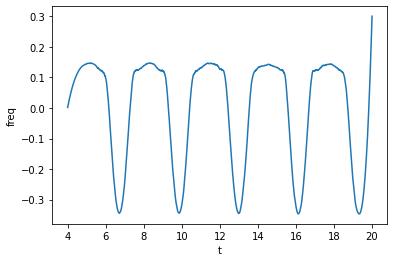

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

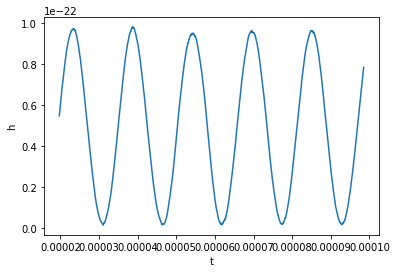

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

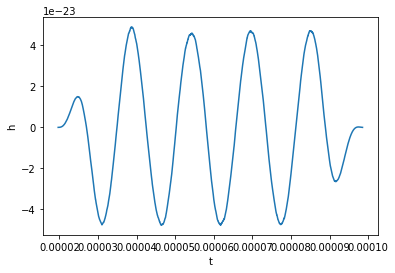

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

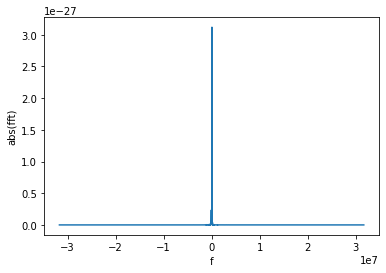

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

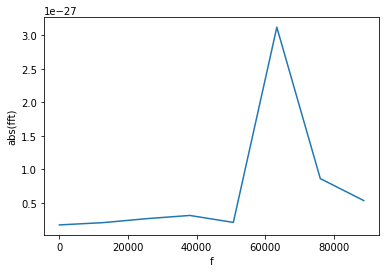

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64233.90


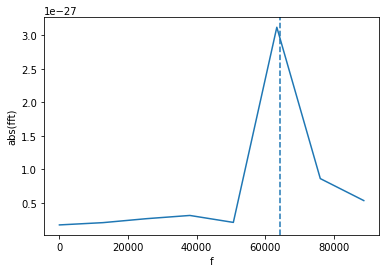

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.118e-27
Maximum with mask 8.637e-28
Length with mask 8
Length after having removed the masked points 7
